## Makemore
Train the model on a specific dataset, and it will make more of it. Step by step.

In [1]:
words = open('names.txt', 'r').read().splitlines()

Bigram language model - work with two characters at a time. Look at the previous character to predict the next one.\
Basic way of building this model is by finding the frequency of characters. We need a hashmap for that.

In [11]:
b = {} # bigram
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # special start and end characters
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [12]:
sorted(b.items(), key = lambda kv: -kv[1 # sort by the value in the dictionary (by the frequency)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [13]:
import torch

In [14]:
N = torch.zeros((28, 28), dtype=torch.int32) # array for all characters (26 characters + start + end)

In [21]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i, s in enumerate(chars)} # mapping strings to integers
stoi['<S>'] = 26
stoi['<E>'] = 27

In [24]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # special start and end characters
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        N[idx1, idx2] += 1

In [26]:
itos = {i:s for s, i in stoi.items()} # mapping integers to strings

(-0.5, 27.5, 27.5, -0.5)

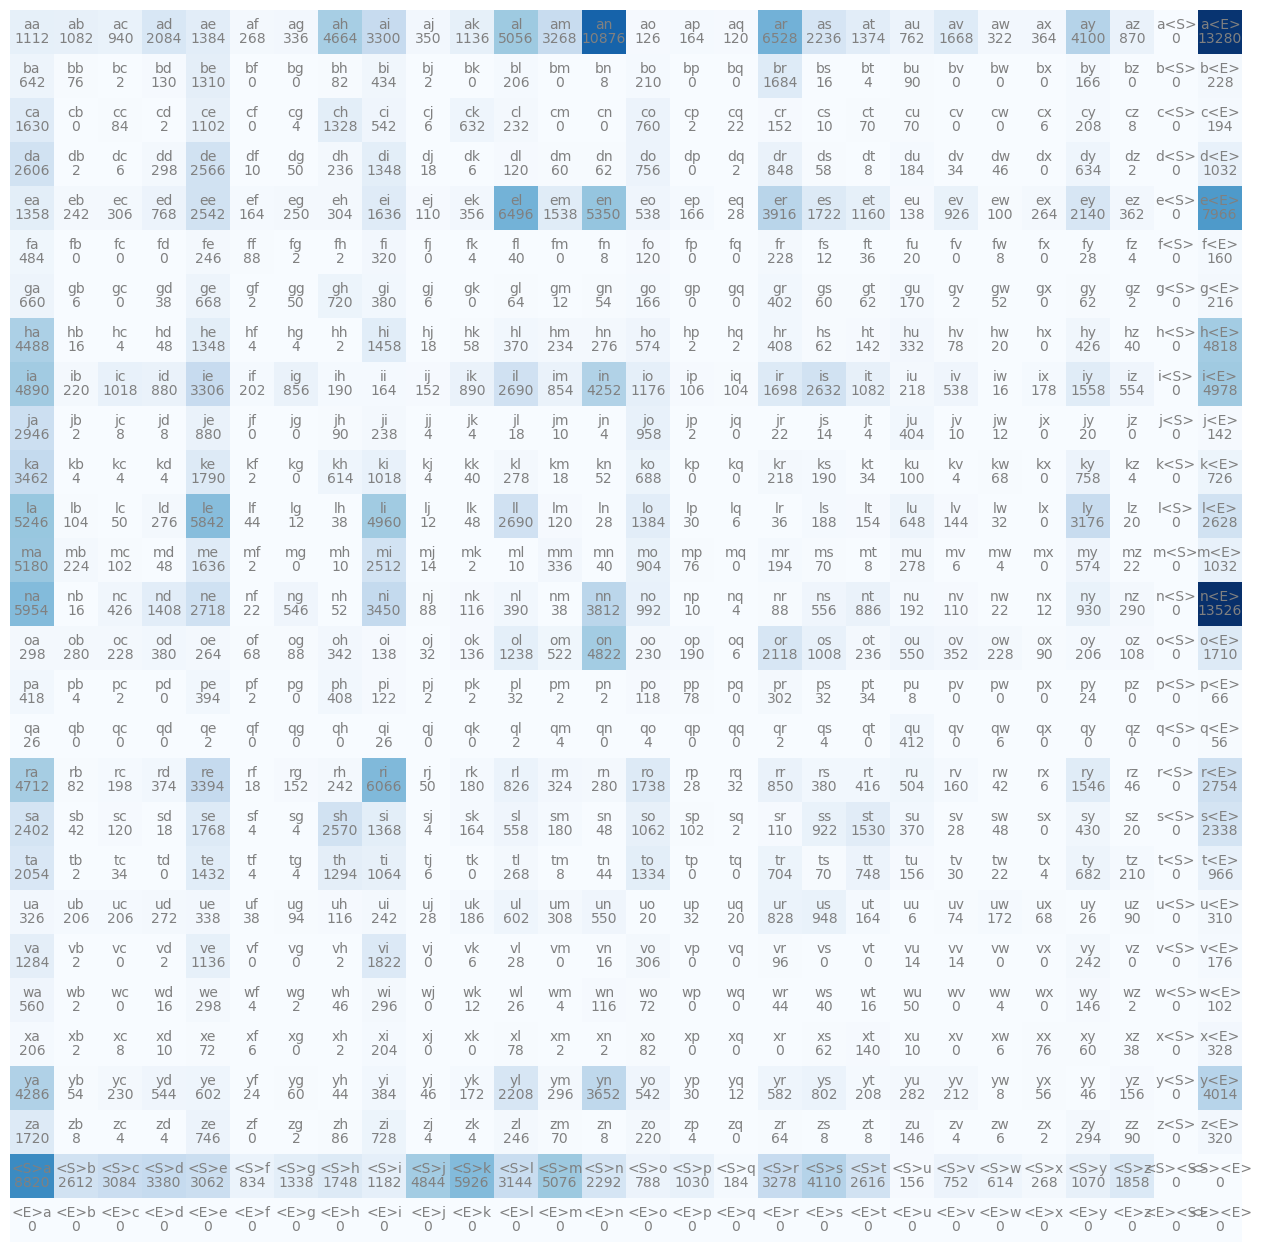

In [28]:
# visualize using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')

Notice how there is an entire column of 0s (because S cannot be the second item in the bigram) and an entire row of 0s (because E can never be the first item in the bigram). To delete this, let's create a single '.' token instead:

In [29]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [30]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [31]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        N[idx1, idx2] += 1

(-0.5, 26.5, 26.5, -0.5)

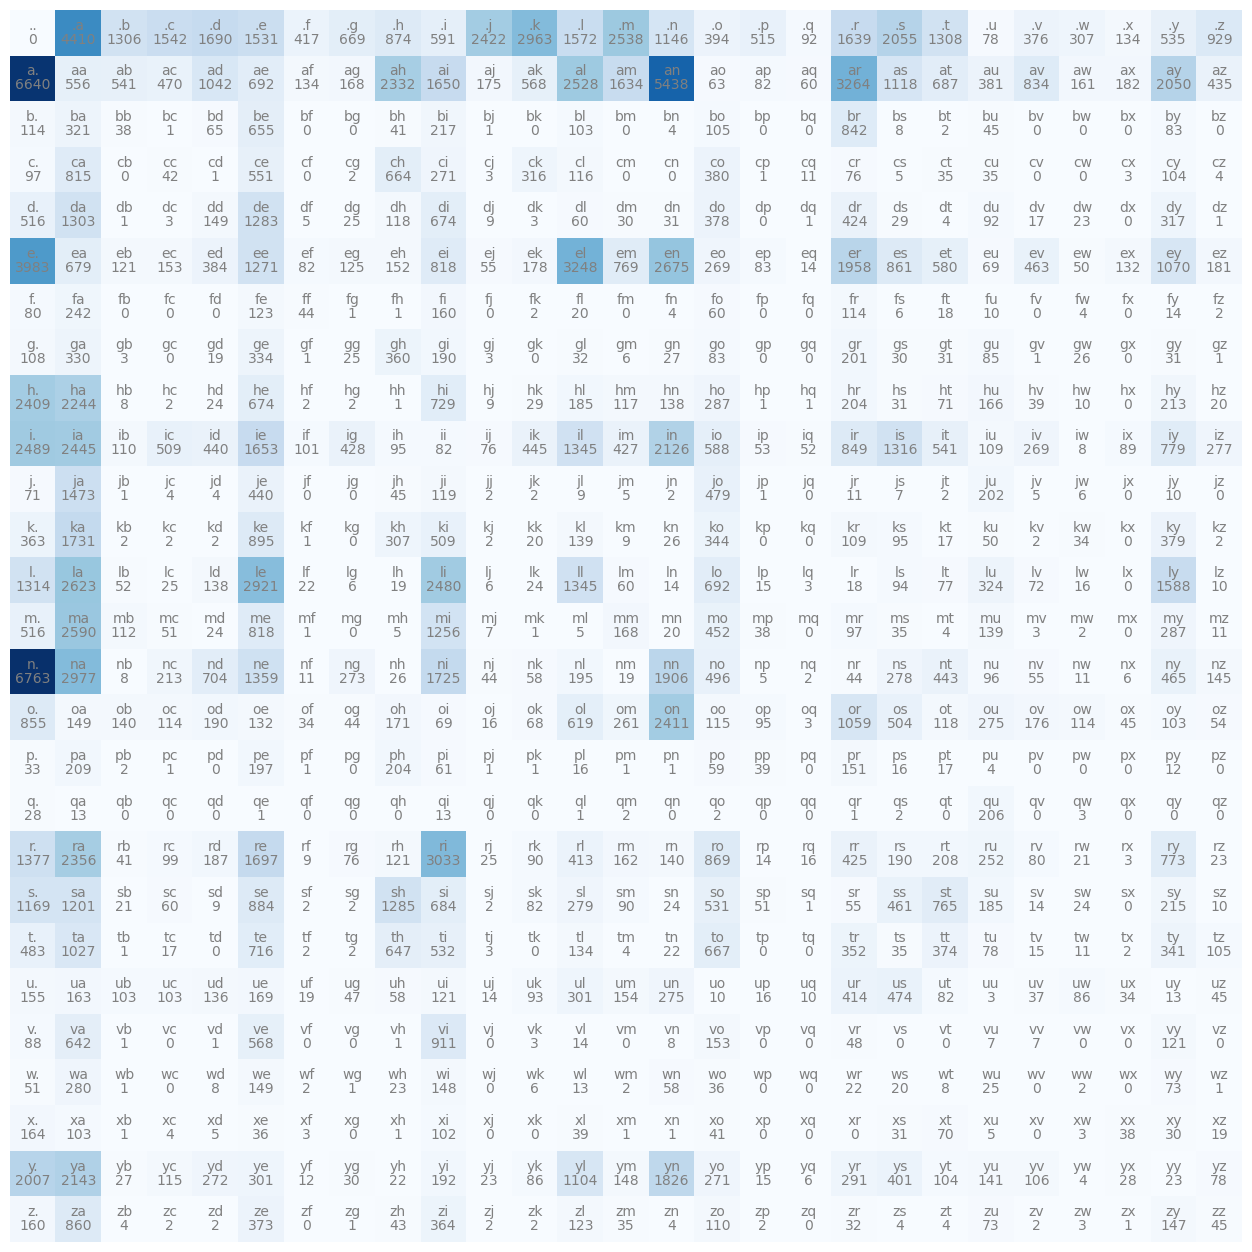

In [32]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [35]:
p = N[0].float() # converting to floats because we're normalizing to create a probability distribution
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

To sample from the distribution we created, we use torch.multinomial

In [36]:
g = torch.Generator().manual_seed(1459855473)
p = torch.rand(3, generator=g)
p /= p.sum()
p
# since the first element has a probability of 0.2924, we would expect about 29% of the elements to be 0 in the next code cell. Same for 1 and 2.

tensor([0.2924, 0.6114, 0.0962])

In [38]:
torch.multinomial(p, num_samples=50, replacement=True, generator=g) # replacement=True means once we sample an element, we put it back

tensor([0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 2, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1,
        1, 0])